# 计算平方根
## 引言
{cite}`russell2004history` 第24章关于早期希腊数学和天文学的内容中包含了这段引人入胜的段落：

 ```{epigraph} 
 2的平方根是第一个被发现的无理数，早期的毕达哥拉斯学派就已知晓，并发明了巧妙的方法来逼近其值。最佳方法如下：形成两列数字，我们称之为 $a$ 列和 $b$ 列；每列都从1开始。在每一步中，下一个 $a$ 是通过加上最后一个 $a$ 和已获得的 $b$ 形成的；下一个 $b$ 是通过加上前一个 $a$ 的两倍和前一个 $b$ 形成的。这样获得的前6对数是 $(1,1), (2,3), (5,7), (12,17), (29,41), (70,99)$。在每一对中，$2a - b$ 等于1或-1。因此，$b/a$ 接近2的平方根，并且每进行一步就会更接近。例如，读者可以自己验证 $99/70$ 的平方非常接近2。
 ```
 
本讲座深入研究了这种古老的计算平方根方法，运用了我们在之前quantecon讲座中学到的一些矩阵代数知识。
特别地，本讲座可以被视为 {doc}`eigen_I` 的续篇。
它提供了一个例子，说明特征向量如何分离出*不变子空间*，帮助构造和分析线性差分方程的解。
当向量 $x_t$ 从不变子空间开始时，迭代差分方程会使 $x_{t+j}$ 对所有 $j \geq 1$ 保持在该子空间中。
不变子空间方法在应用经济动力学中广泛使用，例如在 {doc}`money_inflation` 讲座中。
我们的方法是用一个古老的例子来说明这种方法，这个例子是古希腊数学家用来计算正整数平方根的。

## 完全平方数和无理数
如果一个整数的平方根也是整数，则称该整数为**完全平方数**。
完全平方数的有序序列从以下数字开始：

$$
4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, \ldots 
$$

如果一个整数不是完全平方数，那么它的平方根就是一个无理数 -- 即它不能表示为两个整数的比值，其小数展开是无限的。
古希腊人发明了一种算法来计算整数的平方根，包括那些不是完全平方数的整数。
他们的方法涉及：
 * 计算特定的整数序列 $\{y_t\}_{t=0}^\infty$；
 
 * 计算 $\lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) = \bar r$；
 
 * 从 $\bar r$ 推导出所需的平方根。
 
在本讲座中，我们将描述这种方法。
我们还将使用不变子空间来描述这种方法的变体，这些变体更快。

## 二阶线性差分方程
在讲述古希腊人如何计算平方根之前，我们将简要介绍二阶线性差分方程。
我们将研究以下二阶线性差分方程：

$$
y_t = a_1 y_{t-1} + a_2 y_{t-2}, \quad t \geq 0
$$ (eq:2diff1)

其中 $(y_{-1}, y_{-2})$ 是给定的一对初始条件。
方程 {eq}`eq:2diff1` 实际上是序列 $\{y_t\}_{t=0}^\infty$ 的无限多个线性方程。
对于 $t = 0, 1, 2, \ldots$ 中的每一个 $t$，都有一个方程。
我们可以采用 {doc}`现值<pv>` 讲座中的方法，将所有这些方程堆叠成一个单一的矩阵方程，然后使用矩阵求逆来求解。

```{note} 
在当前情况下，矩阵方程将对一个可数无穷维的方阵与一个可数无穷维的向量进行乘法运算。在一些限定条件下，矩阵乘法和求逆工具适用于这样的方程。
```

但我们不会在这里采用这种方法。
相反，我们将寻找一个时不变函数来*解决*我们的差分方程，这意味着
它为满足方程{eq}`eq:2diff1`的$\{y_t\}_{t=0}^\infty$序列提供了一个公式，适用于每个$t \geq 0$。
我们寻求$y_t, t \geq 0$的表达式，作为初始条件$(y_{-1}, y_{-2})$的函数：

$$ 
y_t = g((y_{-1}, y_{-2});t), \quad t \geq 0.
$$ (eq:2diff2)

我们称这样的函数$g$为差分方程{eq}`eq:2diff1`的*解*。
发现解的一种方法是使用猜测和验证法。
我们将从考虑一对特殊的初始条件开始，
这对初始条件满足

$$
y_{-1} = \delta y_{-2}
$$ (eq:2diff3)

其中$\delta$是待确定的标量。
对于满足{eq}`eq:2diff3`的初始条件，
方程{eq}`eq:2diff1`意味着

$$
y_0 = \left(a_1 + \frac{a_2}{\delta}\right) y_{-1}.
$$ (eq:2diff4)

我们希望

$$
\left(a_1 + \frac{a_2}{\delta}\right) = \delta
$$ (eq:2diff5)

我们可以将其重写为*特征方程*

$$
\delta^2 - a_1 \delta - a_2 = 0.
$$ (eq:2diff6)

应用二次公式求解{eq}`eq:2diff6`的根，我们得到

$$
\delta = \frac{ a_1 \pm \sqrt{a_1^2 + 4 a_2}}{2}.
$$ (eq:2diff7)

对于满足方程{eq}`eq:2diff7`的两个$\delta$中的任一个，
差分方程{eq}`eq:2diff1`的解为

$$
y_t = \delta^t y_0 , \forall t \geq 0
$$ (eq:2diff8)

前提是我们设置

$$
y_0 = \delta y_{-1} . 
$$ 

差分方程{eq}`eq:2diff1`的*一般*解形式为

$$
y_t = \eta_1 \delta_1^t + \eta_2 \delta_2^t
$$ (eq:2diff9)

其中$\delta_1, \delta_2$是特征方程{eq}`eq:2diff6`的两个解{eq}`eq:2diff7`，而$\eta_1, \eta_2$是两个常数，选择它们以满足

$$ 
    \begin{bmatrix} y_{-1} \cr y_{-2} \end{bmatrix} = \begin{bmatrix} \delta_1^{-1} & \delta_2^{-1} \cr \delta_1^{-2} & \delta_2^{-2} \end{bmatrix} \begin{bmatrix} \eta_1 \cr \eta_2 \end{bmatrix} 
$$ (eq:2diff10)

或

$$
\begin{bmatrix} \eta_1 \cr \eta_2 \end{bmatrix} = \begin{bmatrix} \delta_1^{-1} & \delta_2^{-1} \cr \delta_1^{-2} & \delta_2^{-2} \end{bmatrix}^{-1} \begin{bmatrix} y_{-1} \cr y_{-2} \end{bmatrix}
$$ (eq:2diff11)

有时我们可以自由选择初始条件$(y_{-1}, y_{-2})$，在这种情况下，我们
使用系统{eq}`eq:2diff10`来找到相关的$(\eta_1, \eta_2)$。
如果我们选择$(y_{-1}, y_{-2})$使$(\eta_1, \eta_2) = (1, 0)$，那么对于所有$t \geq 0$，$y_t = \delta_1^t$。
如果我们选择$(y_{-1}, y_{-2})$使$(\eta_1, \eta_2) = (0, 1)$，那么对于所有$t \geq 0$，$y_t = \delta_2^t$。
很快我们将把前面的计算与表示差分方程{eq}`eq:2diff1`的转移矩阵的特征分解的组成部分联系起来，这种方式非常方便。
在我们描述古希腊人如何计算不是完全平方的正整数的平方根之前，我们将先转向这个问题。

## 古希腊人的算法

设 $\sigma$ 为大于1的正整数。

因此 $\sigma \in {\mathcal I} \equiv \{2, 3, \ldots \}$。

我们想要一个算法来计算 $\sigma \in {\mathcal I}$ 的平方根。

如果 $\sqrt{\sigma} \in {\mathcal I}$，则 $\sigma$ 被称为*完全平方数*。

如果 $\sqrt{\sigma} \not\in {\mathcal I}$，事实证明它是无理数。

古希腊人使用递归算法来计算非完全平方数的整数的平方根。

该算法在序列 $\{y_t\}_{t=0}^\infty$ 的二阶线性差分方程上迭代：

$$
y_{t} = 2 y_{t-1} - (1 - \sigma) y_{t-2}, \quad t \geq 0
$$ (eq:second_order)

同时还有一对整数作为 $y_{-1}, y_{-2}$ 的初始条件。

首先，我们将使用一些解差分方程的技巧，这些技巧在 {doc}`dynam:samuelson` 中也有应用。

与差分方程 {eq}`eq:second_order` 相关的特征方程是：

$$
c(x) \equiv x^2 - 2 x + (1 - \sigma) = 0
$$ (eq:cha_eq0)

（注意这是上面方程 {eq}`eq:2diff6` 的一个实例。）

对方程 {eq}`eq:cha_eq0` 右侧进行因式分解，我们得到：

$$
c(x)= (x - \lambda_1) (x-\lambda_2) = 0
$$(eq:cha_eq)

其中

$$ 
c(x) = 0 
$$

当 $x = \lambda_1$ 或 $x = \lambda_2$ 时成立。

这两个特殊的 $x$ 值有时被称为 $c(x)$ 的零点或根。

通过应用二次公式求解特征方程 {eq}`eq:cha_eq0` 的根，我们发现：

$$
\lambda_1 = 1 + \sqrt{\sigma}, \quad \lambda_2 = 1 - \sqrt{\sigma}.
$$ (eq:secretweapon)

公式 {eq}`eq:secretweapon` 表明 $\lambda_1$ 和 $\lambda_2$ 都是单变量函数，即 $\sqrt{\sigma}$，这正是我们和一些古希腊人想要计算的对象。

古希腊人有一种间接的方法来利用这个事实来计算正整数的平方根。

他们通过从特定的初始条件 $y_{-1}, y_{-2}$ 开始，然后在差分方程 {eq}`eq:second_order` 上迭代来实现这一点。

差分方程 {eq}`eq:second_order` 的解的形式为：

$$
y_t = \lambda_1^t \eta_1 + \lambda_2^t \eta_2
$$

其中 $\eta_1$ 和 $\eta_2$ 被选择以满足规定的初始条件 $y_{-1}, y_{-2}$：

$$
\begin{aligned}
\lambda_1^{-1} \eta_1 + \lambda_2^{-1} \eta_2 & =  y_{-1} \cr
\lambda_1^{-2} \eta_1 + \lambda_2^{-2} \eta_2 & =  y_{-2}
\end{aligned}
$$(eq:leq_sq)

线性方程组 {eq}`eq:leq_sq` 在本讲座的剩余部分将发挥重要作用。

由于 $\lambda_1 = 1 + \sqrt{\sigma} > 1 > \lambda_2 = 1 - \sqrt{\sigma}$，
因此对于*几乎所有*（但不是所有）初始条件，有：

$$
\lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) = 1 + \sqrt{\sigma}.
$$

因此，

$$
\sqrt{\sigma} = \lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) - 1.
$$

然而，注意如果 $\eta_1 = 0$，则：

$$
\lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) = 1 - \sqrt{\sigma}
$$

所以

$$
\sqrt{\sigma} = 1 - \lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right).
$$

实际上，如果 $\eta_1 =0$，那么：

$$
\sqrt{\sigma} = 1 - \left(\frac{y_{t+1}}{y_t}\right) \quad \forall t \geq 0,
$$

因此收敛是立即的，无需取极限。

对称地，如果 $\eta_2 =0$，那么：

$$
\sqrt{\sigma} =  \left(\frac{y_{t+1}}{y_t}\right) - 1 \quad \forall t \geq 0
$$

所以同样，收敛是立即的，我们不需要计算极限。

线性方程组 {eq}`eq:leq_sq` 可以以多种方式使用。

 * 我们可以将 $y_{-1}, y_{-2}$ 作为给定的初始条件，并求解 $\eta_1, \eta_2$；
 
 * 我们也可以将 $\eta_1, \eta_2$ 作为给定值，并求解初始条件 $y_{-1}, y_{-2}$。
 
注意我们上面是如何使用第二种方法的，例如，我们将 $\eta_1, \eta_2$ 设为 $(0, 1)$ 或 $(1, 0)$。

采用这种第二种方法，我们构造了 ${\bf R}^2$ 的一个*不变子空间*。

这里发生的情况是：

对于 $t \geq 0$ 和方程 {eq}`eq:second_order` 的大多数初始条件对 $(y_{-1}, y_{-2}) \in {\bf R}^2$，$y_t$ 可以表示为 $y_{t-1}$ 和 $y_{t-2}$ 的线性组合。

但对于一些特殊的初始条件 $(y_{-1}, y_{-2}) \in {\bf R}^2$，$y_t$ 可以仅表示为 $y_{t-1}$ 的线性函数。

这些特殊的初始条件要求 $y_{-1}$ 是 $y_{-2}$ 的线性函数。

我们很快将研究这些特殊的初始条件。

但首先让我们编写一些 Python 代码，从任意的 $(y_{-1}, y_{-2}) \in {\bf R}^2$ 开始，在方程 {eq}`eq:second_order` 上迭代。

## 实现

我们现在实现上述算法来计算 $\sigma$ 的平方根。

在本讲座中，我们使用以下导入：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_λs(coefs):    
    # 用 numpy.roots来求根
    λs = np.roots(coefs)
    
    # 对根进行排序以保持一致性
    return sorted(λs, reverse=True)

def solve_η(λ_1, λ_2, y_neg1, y_neg2):
    # 对线性系统求解
    A = np.array([
        [1/λ_1, 1/λ_2],
        [1/(λ_1**2), 1/(λ_2**2)]
    ])
    b = np.array((y_neg1, y_neg2))
    ηs = np.linalg.solve(A, b)
    
    return ηs

def solve_sqrt(σ, coefs, y_neg1, y_neg2, t_max=100):
    # 确保 σ 大于 1
    if σ <= 1:
        raise ValueError("σ 必须大于 1")
        
    # 特征根
    λ_1, λ_2 = solve_λs(coefs)
    
    # 求解 η_1 和 η_2
    η_1, η_2 = solve_η(λ_1, λ_2, y_neg1, y_neg2)

    # 计算序列直到 t_max
    t = np.arange(t_max + 1)
    y = (λ_1 ** t) * η_1 + (λ_2 ** t) * η_2
    
    # 计算大 t 时的比率 y_{t+1} / y_t
    sqrt_σ_estimate = (y[-1] / y[-2]) - 1
    
    return sqrt_σ_estimate

# 用 σ = 2 做个例子
σ = 2

# 特征方程
coefs = (1, -2, (1 - σ))

# 求 σ 的平方根
sqrt_σ = solve_sqrt(σ, coefs, y_neg1=2, y_neg2=1)

# 计算误差
dev = abs(sqrt_σ-np.sqrt(σ))
print(f"sqrt({σ}) 大约为 {sqrt_σ:.5f} (error: {dev:.5f})")

sqrt(2) 大约为 1.41421 (error: 0.00000)


现在我们考虑 $(\eta_1, \eta_2) = (0, 1)$ 和 $(\eta_1, \eta_2) = (1, 0)$ 的情况

In [3]:
# 计算 λ_1, λ_2
λ_1, λ_2 = solve_λs(coefs)
print(f'特征方程的根为 ({λ_1:.5f}, {λ_2:.5f}))')

特征方程的根为 (2.41421, -0.41421))


In [4]:
# 情况 1: η_1, η_2 = (0, 1)
ηs = (0, 1)

# 计算 y_{t} 和 y_{t-1} 当 t >= 0
y = lambda t, ηs: (λ_1 ** t) * ηs[0] + (λ_2 ** t) * ηs[1]
sqrt_σ = 1 - y(1, ηs) / y(0, ηs)

print(f"对于 η_1, η_2 = (0, 1), sqrt_σ = {sqrt_σ:.5f}")

对于 η_1, η_2 = (0, 1), sqrt_σ = 1.41421


In [5]:
# 情况 2: η_1, η_2 = (1, 0)
ηs = (1, 0)
sqrt_σ = y(1, ηs) / y(0, ηs) - 1

print(f"对于 η_1, η_2 = (1, 0), sqrt_σ = {sqrt_σ:.5f}")

对于 η_1, η_2 = (1, 0), sqrt_σ = 1.41421


我们发现收敛是立即的。
接下来，我们将首先将我们的二阶差分方程 {eq}`eq:second_order` 向量化，然后使用相关状态转移矩阵的特征分解来表示前面的分析。

## 差分方程的向量化

用一阶矩阵差分方程表示 {eq}`eq:second_order`

$$
\begin{bmatrix} y_{t+1} \cr y_{t} \end{bmatrix}
= \begin{bmatrix} 2 & - ( 1 - \sigma) \cr 1 & 0 \end{bmatrix} \begin{bmatrix} y_{t} \cr y_{t-1} \end{bmatrix}
$$

或

$$
x_{t+1} = M x_t 
$$

其中

$$
M = \begin{bmatrix} 2 & - (1 - \sigma )  \cr 1 & 0 \end{bmatrix},  \quad x_t= \begin{bmatrix} y_{t} \cr y_{t-1} \end{bmatrix}
$$

构造 $M$ 的特征分解：

$$
M = V \begin{bmatrix} \lambda_1 & 0 \cr 0 & \lambda_2  \end{bmatrix} V^{-1} 
$$ (eq:eigen_sqrt)

其中 $V$ 的列是对应于特征值 $\lambda_1$ 和 $\lambda_2$ 的特征向量。
特征值可以排序，使得 $\lambda_1 > 1 > \lambda_2$。

将方程 {eq}`eq:second_order` 写为

$$
x_{t+1} = V \Lambda V^{-1} x_t
$$

现在我们实现上述算法。
首先，我们编写一个迭代 $M$ 的函数

In [6]:
def iterate_M(x_0, M, num_steps, dtype=np.float64):
    
    #  M 的特征分解
    Λ, V = np.linalg.eig(M)
    V_inv = np.linalg.inv(V)
    
    # Initialize the array to store results
    xs = np.zeros((x_0.shape[0], 
                   num_steps + 1))
    
    # 进行迭代
    xs[:, 0] = x_0
    for t in range(num_steps):
        xs[:, t + 1] = M @ xs[:, t]
    
    return xs, Λ, V, V_inv

# 定义状态转移矩阵M
M = np.array([
      [2, -(1 - σ)],
      [1, 0]])

# 初始条件向量 x_0
x_0 = np.array([2, 2])

# 进行迭代
xs, Λ, V, V_inv = iterate_M(x_0, M, num_steps=100)

print(f"特征值:\n{Λ}")
print(f"特征向量:\n{V}")
print(f"逆特征向量:\n{V_inv}")

特征值:
[ 2.41421356 -0.41421356]
特征向量:
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
逆特征向量:
[[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]


让我们将特征值与我们在上面计算的方程{eq}`eq:cha_eq0`的根{eq}`eq:secretweapon`进行比较。

In [7]:
roots = solve_λs((1, -2, (1 - σ)))
print(f"根: {np.round(roots, 8)}")

根: [ 2.41421356 -0.41421356]


因此，我们确认了{eq}`eq:eigen_sqrt`。
关于我们所寻求的平方根的信息也包含在两个特征向量中。
实际上，每个特征向量只是${\mathbb R}^3$的一个二维子空间，由我们在上面方程{eq}`eq:2diff8`中遇到的以下形式的动态确定：

$$
y_{t} = \lambda_i y_{t-1}, \quad i = 1, 2 
$$ (eq:invariantsub101)


在方程{eq}`eq:invariantsub101`中，第$i$个$\lambda_i$等于$V_{i, 1}/V_{i,2}$。
下图验证了我们示例中的这一点。

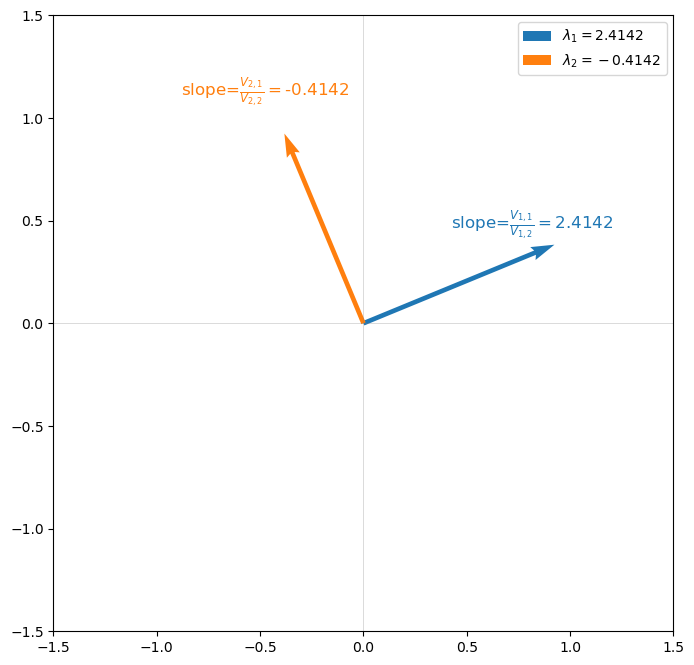

In [8]:
# 绘制特征向量
plt.figure(figsize=(8, 8))

plt.quiver(0, 0, V[0, 0], V[1, 0], angles='xy', scale_units='xy', 
           scale=1, color='C0', label=fr'$\lambda_1={np.round(Λ[0], 4)}$')
plt.quiver(0, 0, V[0, 1], V[1, 1], angles='xy', scale_units='xy', 
           scale=1, color='C1', label=fr'$\lambda_2={np.round(Λ[1], 4)}$')

# 标记斜率
plt.text(V[0, 0]-0.5, V[1, 0]*1.2, 
         r'slope=$\frac{V_{1,1}}{V_{1,2}}=$'+f'{np.round(V[0, 0] / V[1, 0], 4)}', 
         fontsize=12, color='C0')
plt.text(V[0, 1]-0.5, V[1, 1]*1.2, 
         r'slope=$\frac{V_{2,1}}{V_{2,2}}=$'+f'{np.round(V[0, 1] / V[1, 1], 4)}', 
         fontsize=12, color='C1')

# 添加标记
plt.axhline(0, color='grey', linewidth=0.5, alpha=0.4)
plt.axvline(0, color='grey', linewidth=0.5, alpha=0.4)
plt.legend()

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

## 不变子空间方法

前面的计算表明，我们可以使用特征向量 $V$ 构造 2 维*不变子空间*。
现在我们将探讨这种可能性。
定义变换后的变量

$$
x_t^* = V^{-1} x_t
$$

显然，我们可以从 $x_t^*$ 恢复 $x_t$：

$$
x_t = V x_t^*
$$

以下符号和方程将对我们有所帮助。
令

$$
V = \begin{bmatrix} V_{1,1} & V_{1,2} \cr 
                         V_{2,1} & V_{2,2} \end{bmatrix}, \quad
V^{-1} = \begin{bmatrix} V^{1,1} & V^{1,2} \cr 
                         V^{2,1} & V^{2,2} \end{bmatrix}
$$

注意，从以下等式可以得出


$$
 \begin{bmatrix} V^{1,1} & V^{1,2} \cr 
                         V^{2,1} & V^{2,2} \end{bmatrix} \begin{bmatrix} V_{1,1} & V_{1,2} \cr 
                         V_{2,1} & V_{2,2} \end{bmatrix} = \begin{bmatrix} 1  & 0 \cr 0 & 1 \end{bmatrix}
$$


$$
V^{2,1} V_{1,1} + V^{2,2} V_{2,1} = 0
$$

和

$$
V^{1,1}V_{1,2} + V^{1,2} V_{2,2} = 0.
$$

这些方程很快就会非常有用。
注意

$$
\begin{bmatrix} x_{1,t+1}^* \cr x_{2,t+1}^* \end{bmatrix} = \begin{bmatrix} \lambda_1  & 0 \cr 0 & \lambda_2 \end{bmatrix}
\begin{bmatrix} x_{1,t}^* \cr x_{2,t}^* \end{bmatrix}
$$

要使 $\lambda_1$ 失活，我们需要设置

$$
x_{1,0}^* = 0.
$$

这可以通过设置以下内容实现

$$
x_{2,0} =  -( V^{1,2})^{-1} V^{1,1} x_{1,0} = V_{2,2} V_{1,2}^{-1} x_{1,0}.
$$ (eq:deactivate1)

要使 $\lambda_2$ 失活，我们需要设置

$$
x_{2,0}^* = 0
$$

这可以通过设置以下内容实现

$$
x_{2,0} = -(V^{2,2})^{-1} V^{2,1} x_{1,0} = V_{2,1} V_{1,1}^{-1} x_{1,0}.
$$ (eq:deactivate2)

让我们在下面验证 {eq}`eq:deactivate1` 和 {eq}`eq:deactivate2`
要使 $\lambda_1$ 失活，我们使用 {eq}`eq:deactivate1`

In [9]:
xd_1 = np.array((x_0[0], 
                 V[1,1]/V[0,1] * x_0[0]),
                dtype=np.float64)

# 计算 x_{1,0}^*
np.round(V_inv @ xd_1, 8)

array([-0.        , -5.22625186])

我们发现 $x_{1,0}^* = 0$.

现在我们用使{eq}`eq:deactivate2` $\lambda_2$ 失活

In [10]:
xd_2 = np.array((x_0[0], 
                 V[1,0]/V[0,0] * x_0[0]), 
                 dtype=np.float64)

# 计算 x_{2,0}^*
np.round(V_inv @ xd_2, 8)

array([2.1647844, 0.       ])

我们发现 $x_{2,0}^* = 0$.

In [11]:
# 模拟消音的λ1 λ2。
num_steps = 10
xs_λ1 = iterate_M(xd_1, M, num_steps)[0]
xs_λ2 = iterate_M(xd_2, M, num_steps)[0]

# 计算比率 y_t / y_{t-1}
ratios_λ1 = xs_λ1[1, 1:] / xs_λ1[1, :-1]
ratios_λ2 = xs_λ2[1, 1:] / xs_λ2[1, :-1] 

以下图表显示了两种情况下 $y_t / y_{t-1}$ 的比率。
我们发现，在第一种情况下，比率收敛于 $\lambda_2$，而在第二种情况下，比率收敛于 $\lambda_1$。

Font 'default' does not have a glyph for '\u5728' [U+5728], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6d88' [U+6d88], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u97f3' [U+97f3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5728' [U+5728], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6d88' [U+6d88], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u97f3' [U+97f3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5728' [U+5728], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6d88' [U+6d88], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u97f3' [U+97f3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5728' [U+5728], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6d88' [U+6d88], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u97f3' [U+97f3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


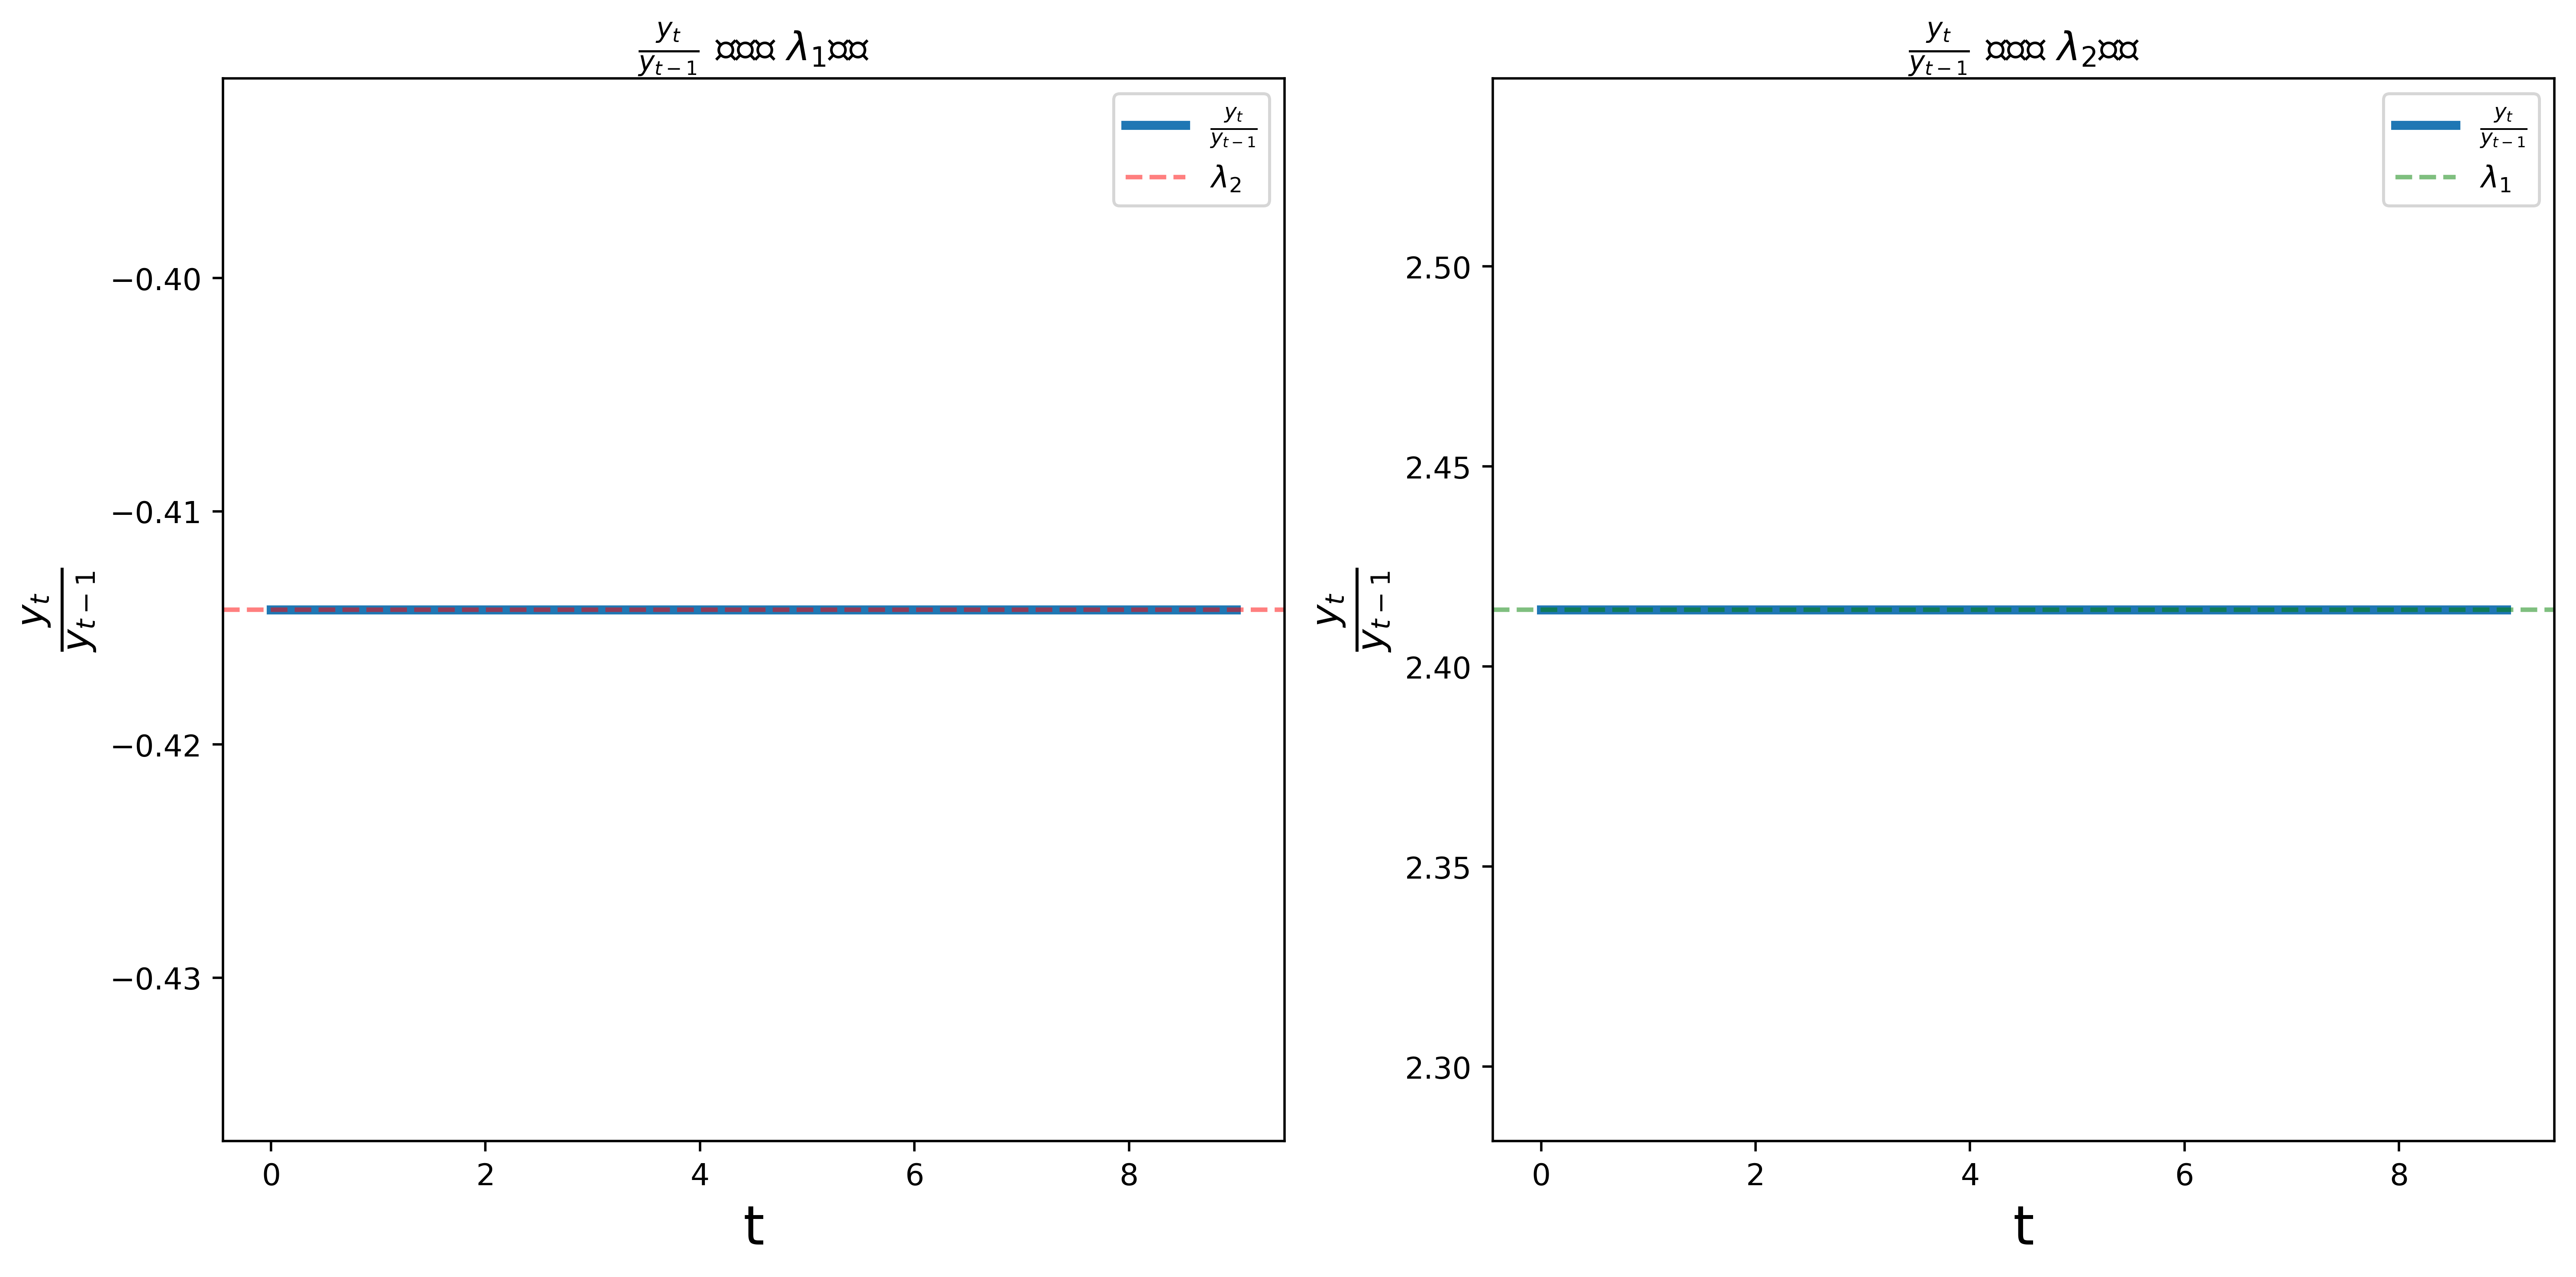

In [12]:
# 绘制比率 y_t / y_{t-1}
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=500)

# 第一子图
axs[0].plot(np.round(ratios_λ1, 6), 
            label=r'$\frac{y_t}{y_{t-1}}$', linewidth=3)
axs[0].axhline(y=Λ[1], color='red', linestyle='--', 
               label='$\lambda_2$', alpha=0.5)
axs[0].set_xlabel('t', size=18)
axs[0].set_ylabel(r'$\frac{y_t}{y_{t-1}}$', size=18)
axs[0].set_title(r'$\frac{y_t}{y_{t-1}}$ 在消音 $\lambda_1$之后', 
                 size=13)
axs[0].legend()

# 第二子图
axs[1].plot(ratios_λ2, label=r'$\frac{y_t}{y_{t-1}}$', 
            linewidth=3)
axs[1].axhline(y=Λ[0], color='green', linestyle='--', 
               label='$\lambda_1$', alpha=0.5)
axs[1].set_xlabel('t', size=18)
axs[1].set_ylabel(r'$\frac{y_t}{y_{t-1}}$', size=18)
axs[1].set_title(r'$\frac{y_t}{y_{t-1}}$ 在消音 $\lambda_2$之后', 
                 size=13)
axs[1].legend()

plt.tight_layout()
plt.show()

## 结束语
本讲为*不变子空间*方法的许多其他应用奠定了基础。
所有这些应用都利用了基于特征分解的非常相似的方程。
我们将在{doc}`money_inflation`和动态经济理论的许多其他地方遇到与{eq}`eq:deactivate1`和{eq}`eq:deactivate2`非常相似的方程。

## 练习

```{exercise-start} 
:label: greek_square_ex_a
```
请使用矩阵代数来表述伯特兰·罗素在本讲座开始时描述的方法。
1. 定义一个状态向量 $x_t = \begin{bmatrix} a_t \cr b_t \end{bmatrix}$。
2. 为 $x_t$ 制定一个一阶向量差分方程，形式为 $x_{t+1} = A x_t$，并计算矩阵 $A$。
3. 使用系统 $x_{t+1} = A x_t$ 来复制伯特兰·罗素描述的 $a_t$ 和 $b_t$ 序列。
4. 计算 $A$ 的特征向量和特征值，并将它们与本讲座文本中计算的相应对象进行比较。

```{exercise-end} 
```

```{solution-start} greek_square_ex_a
:class: dropdown
```
以下是一个解决方案：

根据引用，我们可以表述为：

$$
\begin{aligned}
a_{t+1} &= a_t + b_t \\
b_{t+1} &= 2a_t + b_t
\end{aligned}
$$ (eq:gs_ex1system)

其中 $x_0 = \begin{bmatrix}  a_0 \cr b_0 \end{bmatrix} = \begin{bmatrix}  1 \cr 1 \end{bmatrix}$

根据{eq}`eq:gs_ex1system`，我们可以将矩阵 $A$ 写为：

$$
A = \begin{bmatrix} 1 & 1 \cr 
                2 & 1 \end{bmatrix}
$$

然后，对于 $t \in \{0, \dots, 5\}$，有 $x_{t+1} = A x_t$

In [13]:
# 定义矩阵 A
A = np.array([[1, 1],
              [2, 1]])

# 初始向量 x_0
x_0 = np.array([1, 1])

# 迭代次数
n = 6

# 生成序列
xs = np.array([x_0])
x_t = x_0
for _ in range(1, n):
    x_t = A @ x_t
    xs = np.vstack([xs, x_t])

# 打印序列
for i, (a_t, b_t) in enumerate(xs):
    print(f"迭代 {i}: a_t = {a_t}, b_t = {b_t}")

# 计算 A 的特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f'\nEigenvalues:\n{eigenvalues}')
print(f'\nEigenvectors:\n{eigenvectors}')

迭代 0: a_t = 1, b_t = 1
迭代 1: a_t = 2, b_t = 3
迭代 2: a_t = 5, b_t = 7
迭代 3: a_t = 12, b_t = 17
迭代 4: a_t = 29, b_t = 41
迭代 5: a_t = 70, b_t = 99

Eigenvalues:
[ 2.41421356 -0.41421356]

Eigenvectors:
[[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]


```{solution-end}
```